# Diagnostic

In [2]:
import pandas as pd

In [8]:
df_consumption = pd.read_excel("energy_sources.xlsx", sheet_name="energy consumption by sources", engine='openpyxl')
df_env_impact = pd.read_excel("energy_sources.xlsx", sheet_name="impact of energy sources", engine='openpyxl')
df_cost = pd.read_excel("energy_sources.xlsx", sheet_name="Costs by energy sources", engine='openpyxl')

In [14]:
df_cost.set_index("source of energy", inplace=True)
df_cost


,Cost of MWh production for electricity on 2010 ($),Cost of MWh production for electricity on 2019 ($)
source of energy,,
coal,111,109
wind (onshore),86,53
gas (peaker),275,175
gas (combined cycle),83,56
nuclear energy,96,155
wind (offshore),162,115
solar,378,68


In [26]:
df_env_impact.set_index("source of energy", inplace=True)
df_env_impact

,percentual amount of global energy production,tonnes of greenhouse gas emissions per gigawatt-hour of electricity production,Death rate from accidents and air pollution per terawatt-hour of energy production
source of energy,,,
coal,25,820,24.60
oil,31,720,18.40
gas,23,490,2.80
biomass,7,154,4.60
hydropower,6,34,0.02
nuclear energy,4,3,0.07
wind,2,4,0.04
solar,1,5,0.02


In [13]:
from matplotlib import pyplot as plt

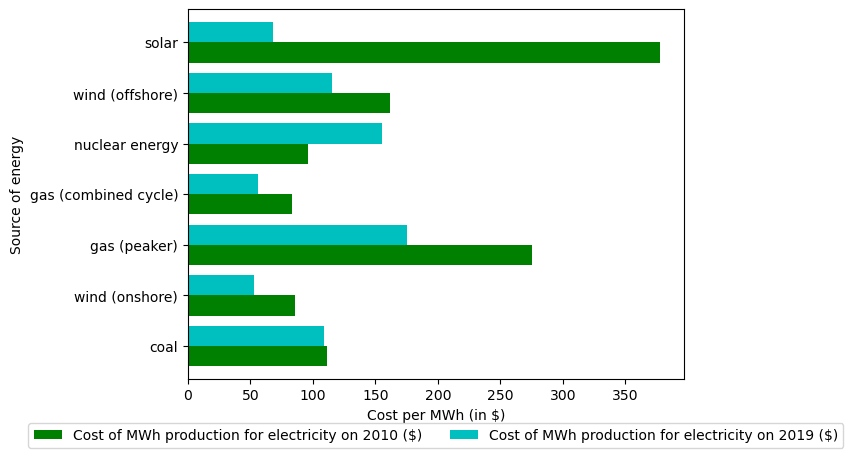

In [68]:
# cost of each energy source

ax = df_cost.plot.barh(width=0.8, color=['g', 'c'])

ax.set_ylabel("Source of energy")
ax.set_xlabel("Cost per MWh (in $)")

ax.set_yticklabels(df_cost.index, rotation=0)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.show()


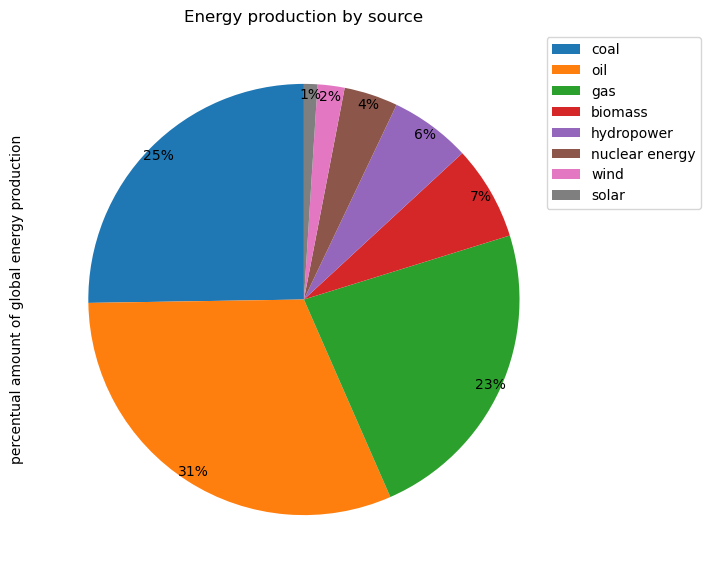

In [62]:
# pie chart of energy production by source

ax = df_env_impact.plot.pie(y="percentual amount of global energy production", figsize=(6, 6), autopct='%1d%%', startangle=90, pctdistance=0.95, labels=None)

ax.set_title('Energy production by source')
ax.legend(df_env_impact.index, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

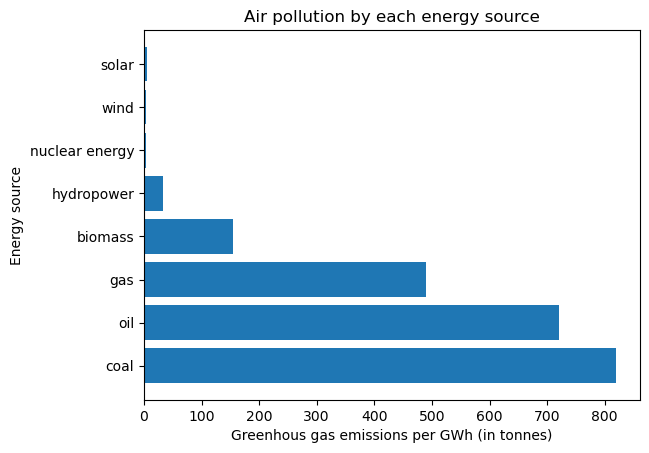

In [67]:
# Air pollution by each energy source

emissions = df_env_impact["tonnes of greenhouse gas emissions per gigawatt-hour of electricity production"]

plt.barh(df_env_impact.index, emissions)

plt.xlabel('Greenhous gas emissions per GWh (in tonnes)')
plt.ylabel('Energy source')
plt.title('Air pollution by each energy source')

plt.show()

In [74]:
df_consumption['Biofuels - EJ'] = df_consumption['Biofuels (TWh)'].apply(lambda x: (x*3.6)/1000)
df_consumption = df_consumption.drop(['Biofuels (TWh)'], axis=1)

In [75]:
# get the consumption in 2010 and 2019

df_consumption_by_year = df_consumption.groupby('Year').sum()

df_year_data = df_consumption_by_year[df_consumption_by_year.index.isin([2010, 2019])]

df_year_data

,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,Biofuels - EJ
Year,,,,,,,,,
2010,144261.408542,94820.298279,125991.701505,263.720113,26875.414913,21655.508174,2710.399992,2971.425742,6.743232
2019,160859.773989,117877.402724,131547.644320,5378.989136,31365.380212,20770.234721,10620.154203,4842.080872,9.987696


In [82]:
# combine datasets and get consumption, cost and emissions for each energy source in 2019

df_2019 = df_year_data.loc[2019].to_frame().T

# invert rows and columns of the dataframe
df_2019 = df_2019.T

# rename the column as Consumption - EJ
df_2019.rename(columns={2019: 'Consumption - EJ'}, inplace=True)

# filter out rows
df_2019 = df_2019[df_2019.index.isin(['Gas Consumption - EJ', 'Coal Consumption - EJ', 'Solar Consumption - EJ', 'Wind Consumption - EJ', 'Nuclear Consumption - EJ'])]

df_2019['Cost (in $)'] = [df_cost.loc['gas (combined cycle)', 'Cost of MWh production for electricity on 2019 ($)'], df_cost.loc['coal', 'Cost of MWh production for electricity on 2019 ($)'], df_cost.loc['solar', 'Cost of MWh production for electricity on 2019 ($)'], df_cost.loc['nuclear energy', 'Cost of MWh production for electricity on 2019 ($)'], df_cost.loc['wind (onshore)', 'Cost of MWh production for electricity on 2019 ($)']]

df_2019

,Consumption - EJ,Cost (in $)
Gas Consumption - EJ,117877.402724,56
Coal Consumption - EJ,131547.644320,109
Solar Consumption - EJ,5378.989136,68
Nuclear Consumption - EJ,20770.234721,155
Wind Consumption - EJ,10620.154203,53
